<a href="https://colab.research.google.com/github/manirajanvn/Stock_prediction/blob/master/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=84973abd3b30a11720d0c9f28b1a6c573478f28267a33b06137f2729f667316d
  Stored in directory: /root/.cache/pip/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
%matplotlib inline
from matplotlib import style
import math
from sklearn import preprocessing
import matplotlib as mpl
import datetime


In [11]:
yf.pdr_override()
df_full = pdr.get_data_yahoo("PAH3.DE", start="2009-01-01").reset_index()
df_full.tail()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
2693,2019-09-09,60.00,61.04,59.84,60.66,60.66,411766
2694,2019-09-10,60.76,61.24,60.34,60.54,60.54,555287
2695,2019-09-11,61.24,61.84,60.20,60.32,60.32,467486
2696,2019-09-12,60.30,61.18,59.84,60.40,60.40,492377
2697,2019-09-13,60.60,61.84,60.60,61.84,61.84,470090


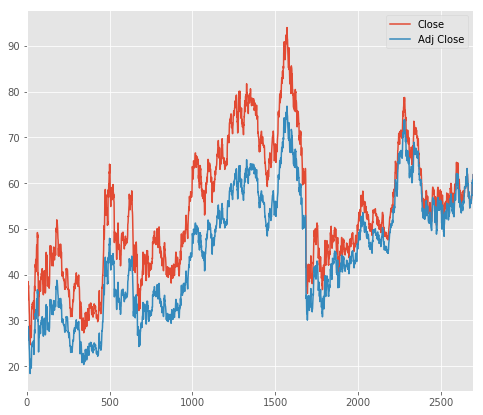

In [14]:
adj_close_px= df_full['Adj Close']
close_px = df_full['Close']
mpl.rc('figure',figsize=(8,7))
mpl.__version__

style.use('ggplot')
close_px.plot(label='Close')
adj_close_px.plot(label='Adj Close')
plt.legend()

In [20]:
df = df_full.loc[:,['Close','Volume','Low','High','Open']]
df.head()

,Close,Volume,Low,High,Open
0,39.94,901567,37.83,40.42,38.30
1,38.41,629475,37.91,40.00,39.89
2,39.32,1467863,37.95,40.95,38.06
3,36.11,1350452,35.65,37.42,37.01
4,35.95,1183009,35.10,36.49,36.25


In [21]:
df[df.isnull().any(axis=1)]

,Close,Volume,Low,High,Open


In [0]:
forcast_col = 'Close'
df['label'] = df[forcast_col].shift(-1)
df= df.drop(df[df.isnull().any(axis=1)].index)
X= np.array(df.drop(['label'],1))

In [0]:
forecast_out = int(math.ceil(0.1 * len(df)))


In [0]:
X = preprocessing.scale(X)

In [0]:
X_test = X[-forecast_out:]
X_train = X[:-forecast_out]

In [0]:
y = np.array(df['label'])
y_train = y[:-forecast_out]
y_test = y[-forecast_out:]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [40]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [41]:
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [42]:
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [43]:
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [44]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.8643274492138393
The quadratic regression 2 confidence is  0.8636967133545332
The quadratic regression 3 confidence is  0.8613027166253672
The knn regression confidence is  0.7584507916941008


In [0]:
forecast_set = clfreg.predict(X_test)
df['Forecast'] = np.nan
index = len(df)- forecast_out
for i in forecast_set:
    df['Forecast'].at[index] = i
    index += 1

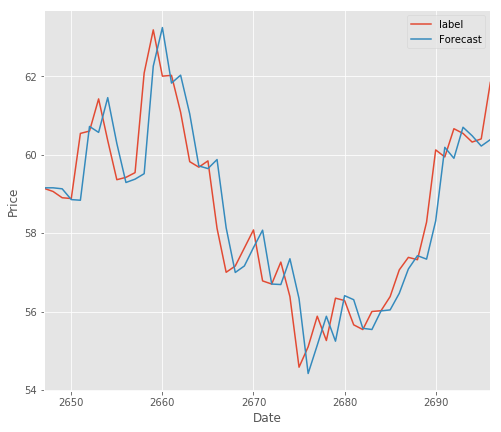

In [55]:
df['label'].tail(50).plot()
df['Forecast'].tail(50).plot()
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()